In [67]:
import pandas as pd

In [68]:
df=pd.read_csv('Loan_Train.csv')

In [69]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
df.drop('Loan_ID', 1,inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [72]:
df.shape

(614, 12)

In [73]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
df.dropna(inplace=True)

In [75]:
#df.isnull().sum()

In [76]:
#loan_approval = df.fillna({'Gender': 'Not Known', 'Married':'Not Known', 'Dependents': -1, 'Self_Employed': 'Not Known', 'LoanAmount':999,'Loan_Amount_Term':999.0,'Credit_History':-1.0})

In [77]:
categorical_column=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Loan_Status']

In [78]:
for x in categorical_column:
    print(df[x].unique())

['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


### Data Visualization

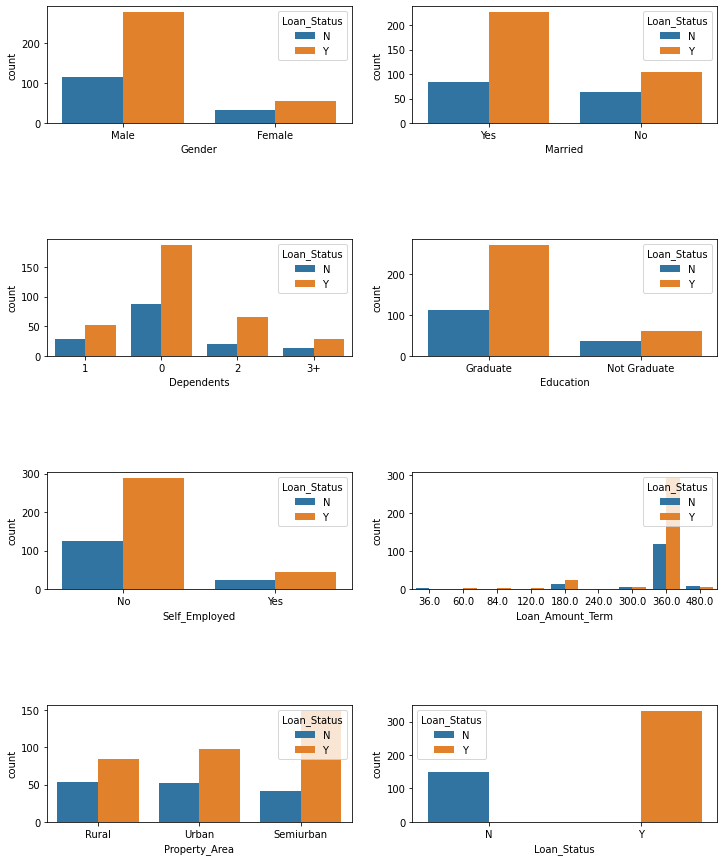

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_column):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

# Data Preprocessing

In [80]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [81]:
label_encoders = {}
for column in categorical_column:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [82]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,7,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,7,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,7,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,7,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,7,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,7,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,4,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,7,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,7,1.0,2,1


# Model selection and model building.

In [83]:
x=df.iloc[:,df.columns!='Loan_Status']
y=df.iloc[:,df.columns=='Loan_Status']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [85]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
602,1,1,3,0,0,5703,0.0,128.0,7,1.0,2
360,0,0,1,0,0,4723,0.0,81.0,7,1.0,1
362,1,1,0,0,0,4750,2333.0,130.0,7,1.0,2
590,1,1,0,0,0,3000,3416.0,56.0,4,1.0,1
298,0,0,0,0,0,5000,2541.0,151.0,8,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
138,1,0,0,0,0,14999,0.0,242.0,7,0.0,1
264,1,0,0,0,1,5166,0.0,128.0,7,1.0,1
277,1,1,0,0,0,3103,1300.0,80.0,7,1.0,2
80,0,0,0,0,0,3846,0.0,111.0,7,1.0,1


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6720594647179847
Validation Mean Accuracy:  0.7446343130553658


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

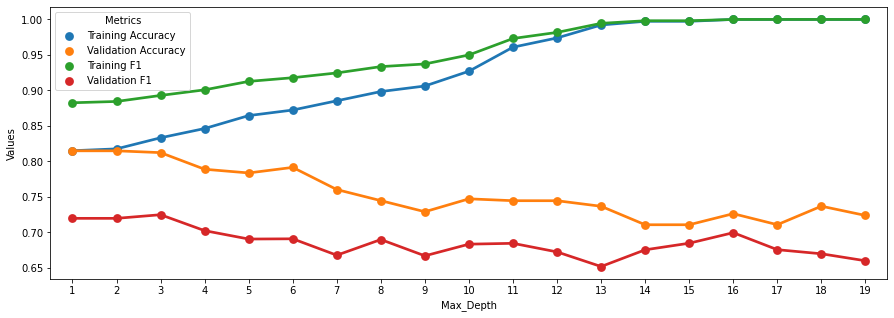

In [87]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [88]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
model=tree_clf
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8333333333333334
Training Data F1 Score  0.8929765886287625
Validation Mean F1 Score:  0.7249587042978678
Validation Mean Accuracy:  0.8124060150375941


In [89]:
from sklearn.ensemble import AdaBoostRegressor
z = AdaBoostRegressor(n_estimators=100, random_state=10)

In [90]:
z.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100, random_state=10)

In [91]:
adaboost_predicter = z.predict(X_test)

In [92]:
result = pd.DataFrame({'Predicted':adaboost_predicter,})
result

,Predicted
0,0.844776
1,0.829060
2,0.759434
3,0.835526
4,0.620000
...,...
91,0.000000
92,0.829060
93,0.759434
94,0.829060


In [93]:
z.score(X_test, y_test)

0.2583601777655866

In [94]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,adaboost_predicter))

0.2583601777655866


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [96]:
rf.fit(X_train, y_train)

<ipython-input-96-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [97]:
rf.fit(X_train, y_train)

<ipython-input-97-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [98]:
random_forest_prediction = rf.predict(X_test)

In [99]:
rfresult = pd.DataFrame({'Predicted':random_forest_prediction})
rfresult

,Predicted
0,0.88
1,0.60
2,0.82
3,0.94
4,0.71
...,...
91,0.06
92,0.89
93,0.93
94,0.76


In [100]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,random_forest_prediction))

0.279847549909256


In [101]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=900, learning_rate=0.09)
xgb.fit(X_train, y_train, 
       early_stopping_rounds=5,
       eval_set=[(X_test, y_test)],
       verbose=False)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [102]:
xgbprediction = xgb.predict(X_test)

In [103]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,xgbprediction))

0.2260149873962395


In [104]:
import pickle

In [105]:
with open('LoanFinal.pickle','wb') as f:
    pickle.dump(model,f)
    f.close()

In [106]:
model = pickle.load(open('LoanFinal.pickle', 'rb'))

In [107]:
y_train.head(10)

,Loan_Status
215,1
368,1
483,1
349,1
428,1
98,1
166,0
315,1
212,1
206,1


In [108]:
#answer=np.array((1.668e+03, 3.890e+03, 2.010e+02, 3.600e+02, 0.000e+00, 1.000e+00,)).reshape(1,-1) 
answer=[[1,1,2,0,0,8333,3167.0,165.0,7,1.0,0]] #1
#answer=[[1,1,0,1,0,7660,0.0,104.0,7,0.0,2]] #0

In [109]:
print ("Predicts: " + str(model.predict(answer)))

Predicts: [1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [110]:
column_names=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']